# STDP-Based Visual Feature Learning

This code is based on this research paper:
http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.0030031&type=printable


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Simulate the S1 cells in the retina

These cells are purposefully designed to trigger if there is a vertical, horizontal or diagonal edge.

Assume that:
* We are given a 3x3 or 5x5 sample (size doesn't matter, but let's assume it's small to only contain a single 'edge')
* For now we will iterate over the image rather than do any clever manipulation using complex vectors or linear algebra (which can probably be done!)
* We will go with vertical, horizontal and diagonal (-45'c and +45'c) edges
* Assume all images are grey-scale which pixels in the range 0-255

In [53]:
def s1(image_subsample):
    gradients = np.gradient(image_subsample)
    gx = gradients[0]
    gy = gradients[1]
    angles = (np.arctan2(gy,gx) * 180 / np.pi)
    min_g = np.min(angles)
    max_g = np.max(angles)
    angle = [max_g if abs(max_g > abs(min_g)) else min_g][0]
    # Create output vector
    print (angle)
    output = np.zeros(8)
    quadrant = int((angle - 22.5) / 45) + 4
    output[quadrant] = 1
    print ('Angle={}, quadrant={}'.format(angle, output))
    return output

* Load the image

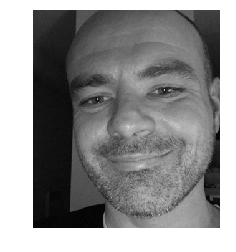

In [27]:
img = cv2.imread('./images/IMG_0827_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

### Process the image 1 stride at a time

* Transpose so that the array is in (x,y) format

(300, 350)


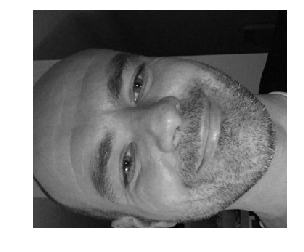

In [28]:
face = np.transpose(img)
print (face.shape)
plt.axis("off")
plt.imshow(face, cmap="gray")
plt.show()

In [30]:
size_x = face.shape[1]
size_y = face.shape[0]
print ('Image dimensions={},{}'.format(size_x, size_y))

Image dimensions=350,300


* Set up convolutions

In [32]:
stride = 3

In [ ]:
for x in range(0, size_x, stride):
    for y in range(0, size_y, stride):
        x_end = x + 3
        y_end = y + 3
        kernel = face[x:x_end, y:y_end]
        orientation = s1(kernel)
        print ('Kernel at coords {},{} has size {} and orientation {}'
               .format(x, y, kernel.shape, orientation))

        

90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,0 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,3 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,6 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,9 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
63.6149821016
Angle=63.614982101626474, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 0,12 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,15 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 0,18 has size (3

90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,225 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,228 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,231 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,234 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,237 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,240 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 3,243 has size (3, 3) and ori

Kernel at coords 9,270 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.7753118204
Angle=89.77531182037549, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 9,273 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.5506305513
Angle=89.55063055129204, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 9,276 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 9,279 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
63.7052099294
Angle=63.70520992941615, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 9,282 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 9,285 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.3233096597
Angle=89.32330965972068, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 9

Kernel at coords 18,132 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,135 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,138 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,141 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,144 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.7753118204
Angle=89.77531182037549, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,147 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 18,150 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  

Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 27,174 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 27,177 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.5488614532
Angle=89.54886145321271, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 27,180 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 27,183 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
0.454718861693
Angle=0.454718861693143, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 27,186 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 27,189 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]


Kernel at coords 39,189 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,192 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,195 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,198 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,201 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,204 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 39,207 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle

Kernel at coords 51,144 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 51,147 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 51,150 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 51,153 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
0.0
Angle=0.0, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 51,156 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 51,159 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 51,162 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=9

90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 63,105 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
64.3589941757
Angle=64.3589941756947, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 63,108 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
88.8766972859
Angle=88.87669728592458, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 63,111 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 63,114 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 63,117 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 63,120 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
87.9786350596
Angle=87.97863505964398, quadrant=[ 0.  0. 

Kernel at coords 75,117 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.7670916101
Angle=89.76709161007949, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 75,120 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
75.9637565321
Angle=75.96375653207353, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 75,123 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
87.3057157101
Angle=87.3057157101439, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 75,126 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 75,129 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
88.4213820277
Angle=88.42138202770188, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 75,132 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.7744272304
Angle=89.77442723036596, quadrant=[ 0.  0.  0.  0.  0.  1. 

90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,21 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,24 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,27 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,30 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.5506305513
Angle=89.55063055129204, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,33 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,36 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 87,39 h

Angle=87.70938995736147, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 96,231 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.8872131781
Angle=89.88721317813769, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 96,234 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 96,237 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.7651825462
Angle=89.76518254620636, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 96,240 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 96,243 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
53.9726266149
Angle=53.97262661489639, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 96,246 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
89.7519678718
Angle=89.751

Angle=89.77173116984659, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 108,291 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
8.49588587835
Angle=8.495885878352018, quadrant=[ 0.  0.  0.  0.  1.  0.  0.  0.]
Kernel at coords 108,294 has size (3, 3) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 108,297 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 111,0 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 111,3 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
89.6603056827
Angle=89.66030568268737, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 111,6 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  

Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,210 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,213 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
88.4213820277
Angle=88.42138202770188, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,216 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,219 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
87.450050987
Angle=87.45005098703982, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,222 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
90.0
Angle=90.0, quadrant=[ 0.  0.  0.  0.  0.  1.  0.  0.]
Kernel at coords 120,225 has size (3, 3) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]
87.3057157101
Angle=87.3057157101439, quadrant=[ 0.  0. 